#Importing Required Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

#Loading the Fashion-MNIST Dataset

In [2]:
# Load dataset from Keras datasets
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Print dataset shape
print(f"Training set shape: {X_train.shape}, Labels: {y_train.shape}")
print(f"Test set shape: {X_test.shape}, Labels: {y_test.shape}")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training set shape: (60000, 28, 28), Labels: (60000,)
Test set shape: (10000, 28, 28), Labels: (10000,)


#Data Preprocessing

In [3]:
# Normalize images (scale pixel values to [0,1])
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape images to add a single channel dimension (for CNN input)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Define class labels
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

#Visualizing Sample Images

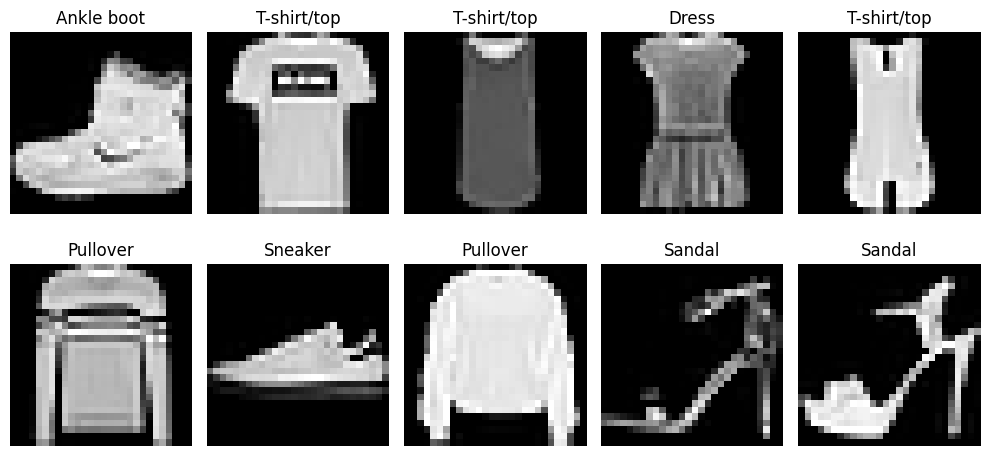

In [4]:
# Display first 10 images from training set
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap='gray')
    plt.title(class_labels[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()

#Building the CNN Model

In [5]:
# Define a Convolutional Neural Network (CNN)
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation='softmax')  # 10 classes for classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#Training the Model

In [6]:
# Train the CNN model
history = model.fit(X_train, y_train, epochs=15, batch_size=64,
                    validation_data=(X_test, y_test))

Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7287 - loss: 0.7520 - val_accuracy: 0.8566 - val_loss: 0.3920
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8670 - loss: 0.3652 - val_accuracy: 0.8866 - val_loss: 0.3145
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8846 - loss: 0.3198 - val_accuracy: 0.8863 - val_loss: 0.3021
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9008 - loss: 0.2753 - val_accuracy: 0.9020 - val_loss: 0.2722
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9079 - loss: 0.2497 - val_accuracy: 0.9023 - val_loss: 0.2690
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9148 - loss: 0.2289 - val_accuracy: 0.9038 - val_loss: 0.2612
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9223 - loss: 0.2111 - val_accuracy: 0.9044 - val_loss: 0.2590
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9251 - loss: 0.1990 - val_accuracy: 0

#Evaluating the Model

In [7]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9129 - loss: 0.2887

Test Accuracy: 0.9125


#Generating Predictions

In [8]:
# Get predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


#Classification Report & Confusion Matrix


Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.90      0.82      0.86      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.87      0.86      0.87      1000
       Dress       0.92      0.90      0.91      1000
        Coat       0.85      0.89      0.87      1000
      Sandal       0.97      0.99      0.98      1000
       Shirt       0.71      0.78      0.74      1000
     Sneaker       0.95      0.98      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.99      0.94      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



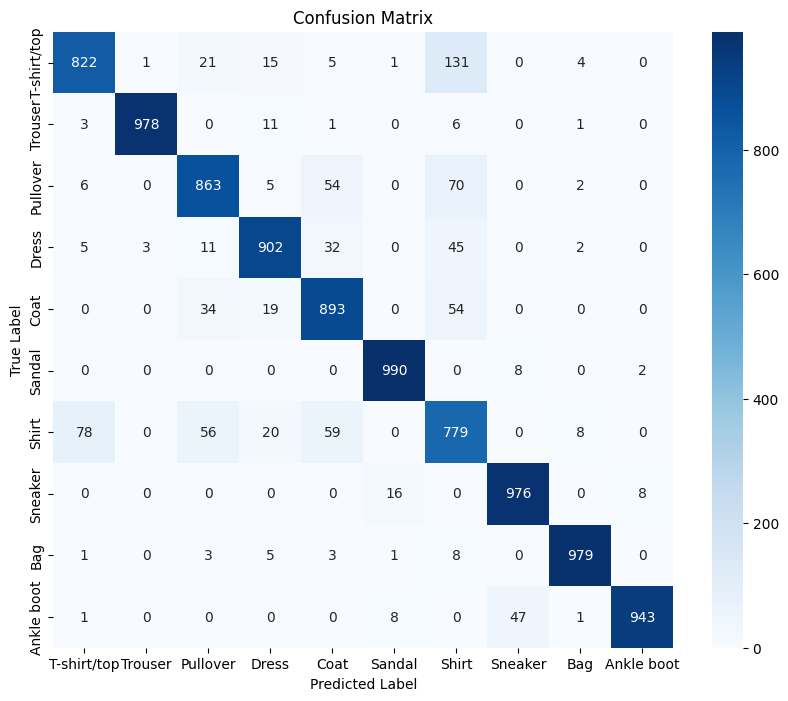

In [9]:
# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_labels))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


#Visualizing Training History

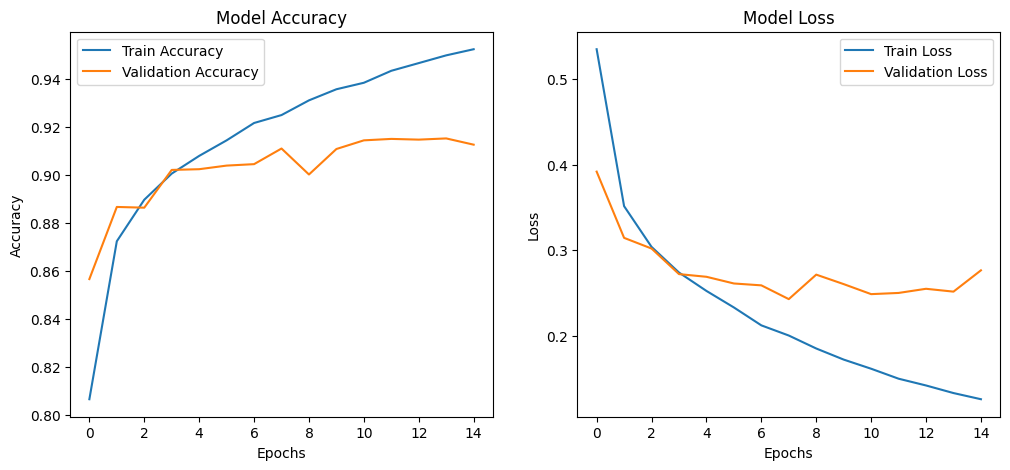

In [10]:
# Plot training and validation accuracy & loss
plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy")

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Model Loss")

plt.show()


#Summary
Analysis of Model Performance from the Accuracy & Loss Graphs
🔹 Observations from the Accuracy Plot (Left)
Train Accuracy (Blue Line) shows a steady increase, reaching around 0.95 (~95%).
A slight gap between training and validation accuracy after a few epochs suggests that the model may be slightly overfitting.
🔹 Observations from the Loss Plot (Right)
Train Loss consistently decreases, indicating effective learning.
Validation Loss decreases initially but starts to fluctuate slightly after a few epochs.
The gap between train and validation loss widens as training progresses, which is a common sign of overfitting.
